# Kelkoo Group - sample data

_2020-June_

_Imperial College Business School_


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf

In [2]:
impr = pd.read_csv('base_offer_imps.csv', index_col=None, header=0)
lead = pd.read_csv('base_leads.csv', index_col=None, header=0)
sale = pd.read_csv('base_sales.csv', index_col=None, header=0)

In [3]:
impr.date_time = pd.to_datetime(impr.date_time)
lead.date_time = pd.to_datetime(lead.date_time, format='%d/%m/%Y:%H:%M:%S')
sale.date_time = pd.to_datetime(sale.date_time)
sale.lead_date = pd.to_datetime(sale.lead_date)

In [4]:
impr.info()
lead.info()
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18809 entries, 0 to 18808
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   total_rank_score   18809 non-null  float64            
 1   search_id          18809 non-null  object             
 2   offer_id           18809 non-null  object             
 3   static_rank_score  18809 non-null  float64            
 4   date_time          18809 non-null  datetime64[ns, UTC]
 5   cpc_search_rank    18809 non-null  float64            
 6   currency           18809 non-null  object             
 7   position           18809 non-null  int64              
 8   category_id        18809 non-null  int64              
 9   merchant_id        18809 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(3)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data column

## Impresions
-----

In [5]:
print(impr.shape)
print(impr.search_id.nunique())
print(impr.offer_id.nunique())

(18809, 10)
15726
3546


In [132]:
56/409

0.13691931540342298

In [104]:
impr_offer = impr[['offer_id', 'search_id']].groupby(['offer_id']).count().reset_index().sort_values('search_id', ascending=False)
impr_offer['proportion'] = impr_offer['search_id'] / impr.shape[0]
impr_offer

,offer_id,search_id,proportion
1621,6d8a61de462abd62bded0daeaa5194b5,291,0.015471
3054,db4137ce26b38efacfdf18e314f92257,213,0.011324
3330,ee5d4e559f3be3f864c6a4ef04e89b34,212,0.011271
307,1384cd339047efb2c51b48662000f5cb,198,0.010527
2626,b8c77be57b8b3913732f95af31fba6df,191,0.010155
...,...,...,...
1109,4bf11054f64076f263fa30a17fe0d94c,1,0.000053
2450,aaef71eb5588c455fd1389c8fb71070b,1,0.000053
657,2b48879e32ac56adcffc5e9db86460bf,1,0.000053
659,2b7aeedd2a264c7a1036d07cdd0b9b3b,1,0.000053


In [129]:
impr_offer.describe()

,search_id,proportion
count,3546.000000,3546.000000
mean,5.304287,0.000282
std,12.275914,0.000653
min,1.000000,0.000053
25%,1.000000,0.000053
50%,2.000000,0.000106
75%,5.000000,0.000266
max,291.000000,0.015471


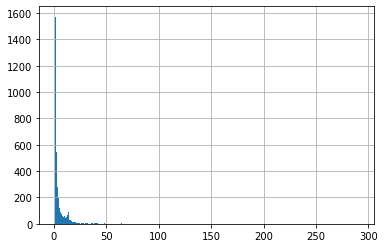

In [107]:
# Plot histogram

impr_offer['search_id'].hist(bins = 291)

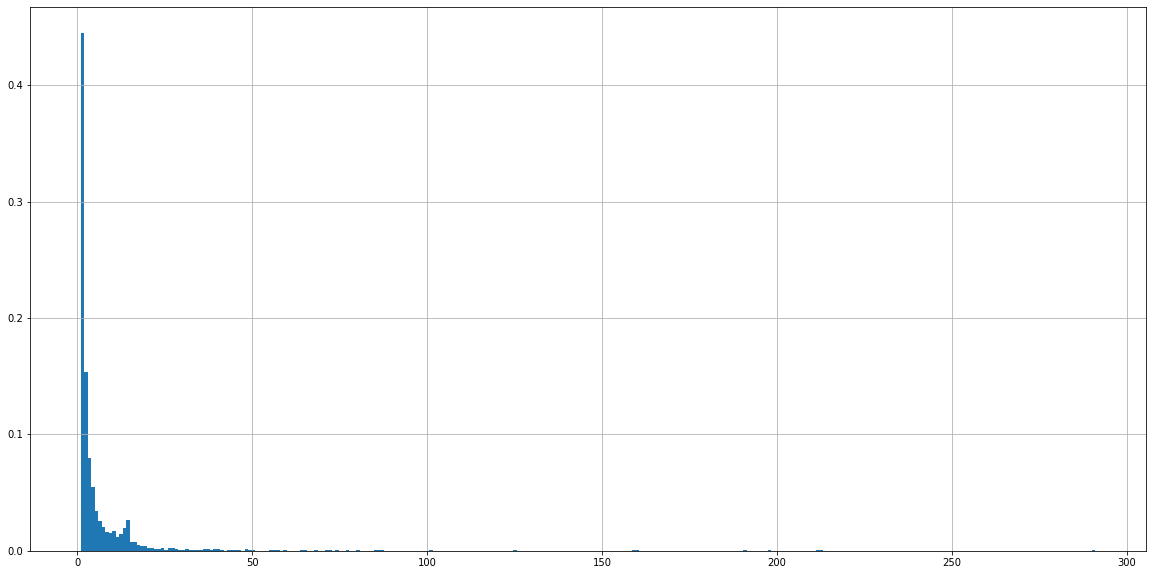

In [130]:
# Plot density
plt.figure(figsize=(20,10))
impr_offer['search_id'].hist(bins = 291, density=True)

<module 'matplotlib.pyplot' from 'C:\\Users\\alons\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

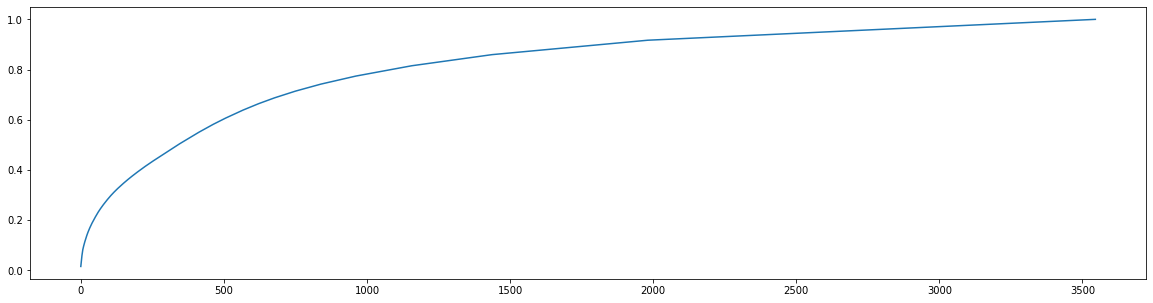

In [113]:
# Plot cumulative distribution
plt.figure(figsize=(20,5))
impr_offer.reset_index().proportion.cumsum().plot()
plt

In [132]:
category = sqldf("""
SELECT category_id, COUNT(*) AS total_leads, COUNT(DISTINCT offer_id) AS total_products
FROM impr
GROUP BY category_id
ORDER BY total_products DESC
""")
category.head()

,category_id,total_leads,total_products
0,150701,3422,1112
1,6513,4726,859
2,149201,5110,834
3,100567513,934,300
4,100295523,397,103


In [9]:
lead.head()

,lead_id,date_time,lead_type,offer_id,merchant_id
0,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158577...,2020-04-01 19:40:49,kelbest,5cc371b69f5135434b72fb9df0c20e7b,100498219
1,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158575...,2020-04-01 14:41:19,kelbest,c87603232de417823a132a23ba75b7ee,100498219
2,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158577...,2020-04-01 20:50:24,kelbest,739c78a5b8adca7ab84aa07bafb5102e,100498219
3,dc1-kls-prod-silo-01.prod.dc1.kelkoo.net_15857...,2020-04-01 10:59:16,kelbest,c6f60030a4a5cee6adcc552162422f21,100498219
4,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158574...,2020-04-01 12:50:30,kelbest,b4814fc4f5011de8983231287fba8266,100498219


## Leads
-----

In [8]:
print(lead.shape)
print(lead.lead_id.nunique())
print(lead.offer_id.nunique())

(1002, 5)
1002
600


In [11]:
lead_offer = lead[['offer_id', 'lead_id']].groupby(['offer_id']).count().reset_index().sort_values('lead_id', ascending=False)
lead_offer

,offer_id,lead_id
596,fe6ec00416b7f0d8b7940226086c9b00,55
440,b4814fc4f5011de8983231287fba8266,34
455,bc8a21b8cf48cf18006fe0caf43d0d88,28
215,5cc371b69f5135434b72fb9df0c20e7b,17
176,512bac2982e141bb327169710abaf2b9,15
...,...,...
81,1fe11acc3aba922054eaa52add2731b1,1
275,721f17e79acb150db1917989d1d7fd1d,1
83,209571ea7699764290ecff62bafe491c,1
84,20b3acd30ad9224348f0a47d7eaf9d4d,1


## Sales
-----

In [12]:
print(sale.shape)
print(sale.lead_id.nunique())
print(sale.order_id.nunique())


(190, 24)
158
162


In [17]:
sale_offer = sale[['lead_id','order_id']].groupby(['lead_id']).count().reset_index().sort_values('order_id', ascending=False)
sale_offer

,lead_id,order_id
52,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158611...,3
157,dc3-kls-prod-srv-03.prod.dc3.kelkoo.net_158582...,2
42,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158584...,2
31,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158573...,2
32,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158574...,2
...,...,...
55,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158619...,1
54,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158617...,1
53,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158613...,1
51,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158610...,1


In [20]:
sale_rev = sale[['lead_id','local_order_value']].groupby(['lead_id']).sum().reset_index().sort_values('local_order_value', ascending=False)
sale_rev

,lead_id,local_order_value
31,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158573...,78.79
110,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158619...,65.87
65,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158626...,52.50
43,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158584...,48.98
115,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158626...,46.69
...,...,...
128,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158566...,-17.89
120,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158532...,-44.85
76,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158549...,-44.85
74,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158542...,-44.85


In [21]:
sale['count_sales'] = 1

In [70]:
sale_lead = sale[['lead_id', 'count_sales']].groupby(['lead_id']).sum().reset_index()
sale_lead.sum()

lead_id        dc1-kls-prod-silo-01.prod.dc1.kelkoo.net_15853...
count_sales                                                  190
dtype: object

## Join DBs

In [71]:
leads_sales = pd.merge(lead, sale_lead, how='left', on=['lead_id', 'lead_id']).fillna(0)

In [72]:
leads_sales['count_leads'] = 1
leads_sales

,lead_id,date_time,lead_type,offer_id,merchant_id,count_sales,count_leads
0,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158577...,2020-04-01 19:40:49,kelbest,5cc371b69f5135434b72fb9df0c20e7b,100498219,0.0,1
1,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158575...,2020-04-01 14:41:19,kelbest,c87603232de417823a132a23ba75b7ee,100498219,0.0,1
2,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158577...,2020-04-01 20:50:24,kelbest,739c78a5b8adca7ab84aa07bafb5102e,100498219,0.0,1
3,dc1-kls-prod-silo-01.prod.dc1.kelkoo.net_15857...,2020-04-01 10:59:16,kelbest,c6f60030a4a5cee6adcc552162422f21,100498219,0.0,1
4,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158574...,2020-04-01 12:50:30,kelbest,b4814fc4f5011de8983231287fba8266,100498219,0.0,1
...,...,...,...,...,...,...,...
997,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158628...,2020-04-07 19:46:59,kelbest,d55b7a7b17aff2e45b2a355ada7991e9,100498219,0.0,1
998,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158626...,2020-04-07 14:09:53,kelbest,f17e3e9743477361d7d32f3543872642,100498219,0.0,1
999,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158627...,2020-04-07 16:44:14,kelbest,a8a7574337c91e51e8602a5986f608bc,100498219,0.0,1
1000,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158628...,2020-04-07 18:03:25,kelbest,4ceaec1932cd04955defa5d71716d345,100498219,0.0,1


In [73]:
offer_lead_sale = leads_sales[['offer_id','count_leads', 'count_sales']].groupby(['offer_id']).sum().reset_index()
offer_lead_sale

,offer_id,count_leads,count_sales
0,0016c83928e65590768f724402e12c9d,2,0.0
1,005fc8198dcfacd29c4b5632203d00f2,2,0.0
2,009d37f2c05fa40eea9d38db1b2cfc6d,1,0.0
3,009ed219b4824f29e802e0f7161a2f97,1,0.0
4,024589041695cf30366cb08e262202ec,2,1.0
...,...,...,...
595,fe5b34d4b532d982fffafd1a9cca5992,2,0.0
596,fe6ec00416b7f0d8b7940226086c9b00,55,9.0
597,fe9660fb8e03791f44e5a596bdde30f7,1,1.0
598,ff4cb6bf92a22aa539cceea89a3075e2,2,0.0


In [74]:
offer_lead_sale.sum()

offer_id       0016c83928e65590768f724402e12c9d005fc8198dcfac...
count_leads                                                 1002
count_sales                                                  130
dtype: object

In [135]:
impr['count_impr'] = 1
impr_group = impr[['offer_id','category_id', 'count_impr']].groupby(['offer_id', 'category_id']).sum().reset_index()

In [136]:
impr_group

,offer_id,category_id,count_impr
0,00057b1e1d96fccd6467f55f51f327ad,6513,5
1,0016c83928e65590768f724402e12c9d,6513,15
2,00173de7b831714fd892618281f0f066,6513,1
3,001b6a513e050c431fcb243915d3d20b,100567513,5
4,003b74fe5965959de827c4ba9ae2054f,149201,1
...,...,...,...
3542,ff46582882f511bbbcd100493d257537,110401,3
3543,ff4c21b9db1d3c688f996c6d44925d71,149201,1
3544,ff9c788599840f6556c50dd4d51ea7c0,150701,1
3545,ffc528c93a0aceaa0fe0694a4e6040cf,149201,1


In [138]:
offer_funnel = pd.merge(impr_group, offer_lead_sale, how='left', on=['offer_id', 'offer_id']).fillna(0)

In [139]:
offer_funnel

,offer_id,category_id,count_impr,count_leads,count_sales
0,00057b1e1d96fccd6467f55f51f327ad,6513,5,0.0,0.0
1,0016c83928e65590768f724402e12c9d,6513,15,2.0,0.0
2,00173de7b831714fd892618281f0f066,6513,1,0.0,0.0
3,001b6a513e050c431fcb243915d3d20b,100567513,5,0.0,0.0
4,003b74fe5965959de827c4ba9ae2054f,149201,1,0.0,0.0
...,...,...,...,...,...
3542,ff46582882f511bbbcd100493d257537,110401,3,0.0,0.0
3543,ff4c21b9db1d3c688f996c6d44925d71,149201,1,0.0,0.0
3544,ff9c788599840f6556c50dd4d51ea7c0,150701,1,0.0,0.0
3545,ffc528c93a0aceaa0fe0694a4e6040cf,149201,1,0.0,0.0


In [140]:
offer_funnel.sum()

offer_id       00057b1e1d96fccd6467f55f51f327ad0016c83928e655...
category_id                                          60266608769
count_impr                                                 18809
count_leads                                                  401
count_sales                                                   56
dtype: object

In [143]:
category_funnel = offer_funnel.groupby('category_id').sum().reset_index()

In [152]:
category_funnel['CTR'] = category_funnel['count_leads']/category_funnel['count_impr']
category_funnel['CV'] = category_funnel['count_sales']/category_funnel['count_leads']
category_funnel.sort_values('CTR', ascending = False)

,category_id,count_impr,count_leads,count_sales,CTR,CV
1,6513,4726,359.0,53.0,0.075963,0.147632
5,112201,832,9.0,0.0,0.010817,0.000000
20,168001,97,1.0,1.0,0.010309,1.000000
7,113201,132,1.0,0.0,0.007576,0.000000
30,100291923,872,4.0,0.0,0.004587,0.000000
12,120901,240,1.0,0.0,0.004167,0.000000
18,149201,5110,18.0,1.0,0.003523,0.055556
37,100567513,934,2.0,0.0,0.002141,0.000000
19,150701,3422,6.0,1.0,0.001753,0.166667
32,100310723,2,0.0,0.0,0.000000,NaN


## Missing values

In [85]:
unique_leads = pd.DataFrame(lead.lead_id.unique(), columns=['lead_id'])
unique_leads['count_leads'] = 1
unique_leads

,lead_id,count_leads
0,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158577...,1
1,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158575...,1
2,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158577...,1
3,dc1-kls-prod-silo-01.prod.dc1.kelkoo.net_15857...,1
4,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158574...,1
...,...,...
997,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158628...,1
998,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158626...,1
999,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158627...,1
1000,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158628...,1


In [87]:
unique_leads_sales = pd.DataFrame(sale.lead_id.unique(), columns=['lead_id'])
unique_leads_sales

,lead_id
0,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158599...
1,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158627...
2,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158625...
3,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158625...
4,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158549...
...,...
153,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158593...
154,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158565...
155,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158591...
156,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158592...


In [93]:
missing_leads =  pd.merge(unique_leads_sales, unique_leads, how='left', on=['lead_id', 'lead_id']).fillna(0)
missing_leads.groupby('count_leads').count()

,lead_id
count_leads,
0.0,54
1.0,104


In [95]:
missing_leads

,lead_id,count_leads
0,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158599...,1.0
1,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158627...,1.0
2,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158625...,1.0
3,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158625...,1.0
4,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158549...,0.0
...,...,...
153,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158593...,1.0
154,dc1-kls-prod-srv-06.prod.dc1.kelkoo.net_158565...,0.0
155,dc1-kls-prod-srv-04.prod.dc1.kelkoo.net_158591...,1.0
156,dc1-kls-prod-srv-05.prod.dc1.kelkoo.net_158592...,1.0


In [91]:
unique_offers = pd.DataFrame(impr.offer_id.unique(), columns=['offer_id'])
unique_offers['count_offers'] = 1
unique_offers

,offer_id,count_offers
0,db4137ce26b38efacfdf18e314f92257,1
1,a6beaf5afc7c11f9328ea421f4b5a537,1
2,1dc48266e94f93c42a80a6b8b517ac15,1
3,7cd616671a3d8f2d09f210f8cf439ab8,1
4,44423bb739aa04ccb798de92fad8cc14,1
...,...,...
3541,ff2a60aff4e82b678d621cc8ae1abf60,1
3542,33b7a2aa81e166a492c1a116438311e7,1
3543,7db585d2da37863be627383cee50d207,1
3544,f08d8511bea162b9ca9aebc89426be1f,1


In [92]:
unique_offers_leads = pd.DataFrame(lead.offer_id.unique(), columns=['offer_id'])
unique_offers_leads

,offer_id
0,5cc371b69f5135434b72fb9df0c20e7b
1,c87603232de417823a132a23ba75b7ee
2,739c78a5b8adca7ab84aa07bafb5102e
3,c6f60030a4a5cee6adcc552162422f21
4,b4814fc4f5011de8983231287fba8266
...,...
595,d4efdabc2dd31ce604a6d0f72a1563a4
596,d0784e6cea0440d903f61f94ff67adc0
597,f17e3e9743477361d7d32f3543872642
598,a8a7574337c91e51e8602a5986f608bc


In [94]:
missing_offers =  pd.merge(unique_offers_leads, unique_offers, how='left', on=['offer_id', 'offer_id']).fillna(0)
missing_offers.groupby('count_offers').count()

,offer_id
count_offers,
0.0,421
1.0,179
